In [9]:
from spectral import * 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import imageio as io
from PIL import Image
import numpy as np

mpl.rc('image', cmap='terrain')
mpl.rcParams['text.color'] = 'grey'
mpl.rcParams['xtick.color'] = 'grey'
mpl.rcParams['ytick.color'] = 'grey'
mpl.rcParams['axes.labelcolor'] = 'grey'
plt.rcParams["font.family"] = "Laksaman"

def remove_ticks(ax):
    ax.set_xticks([]) 
    ax.set_yticks([]) 

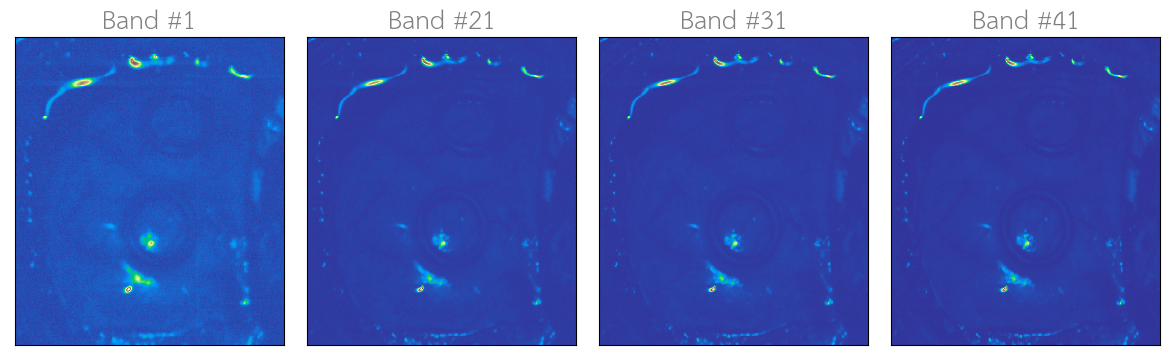

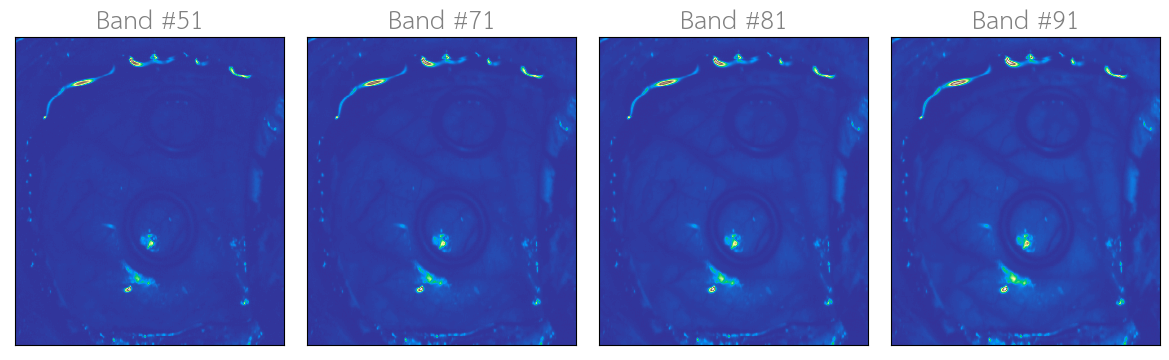

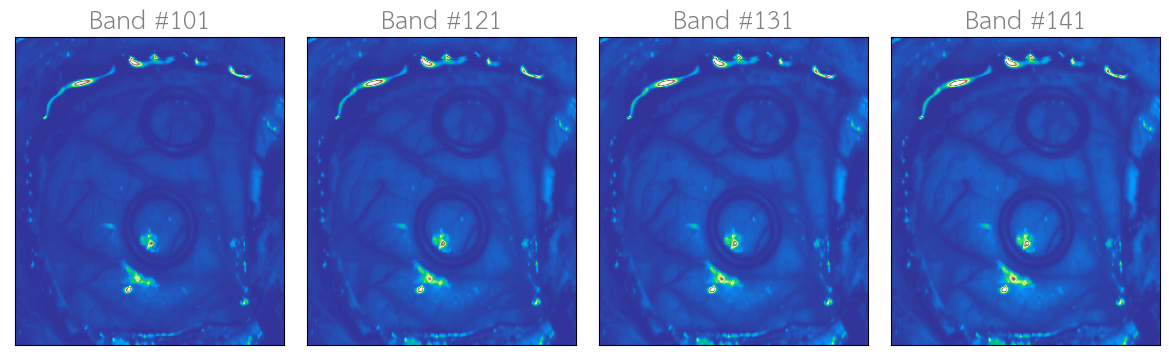

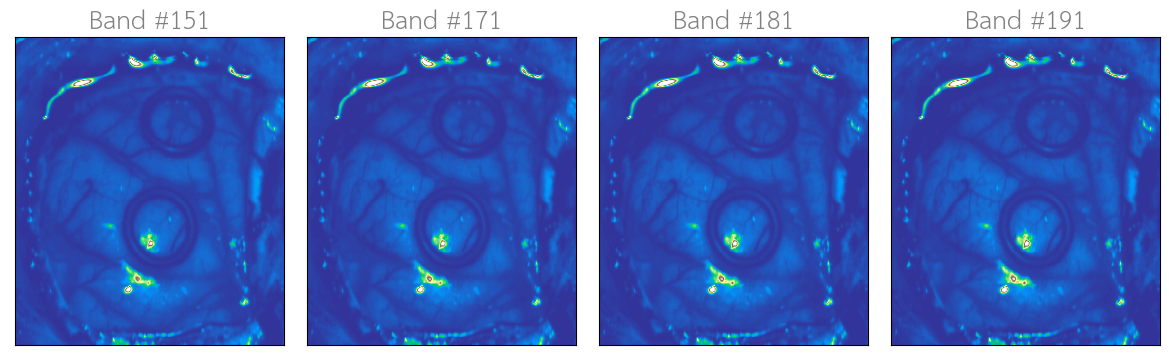

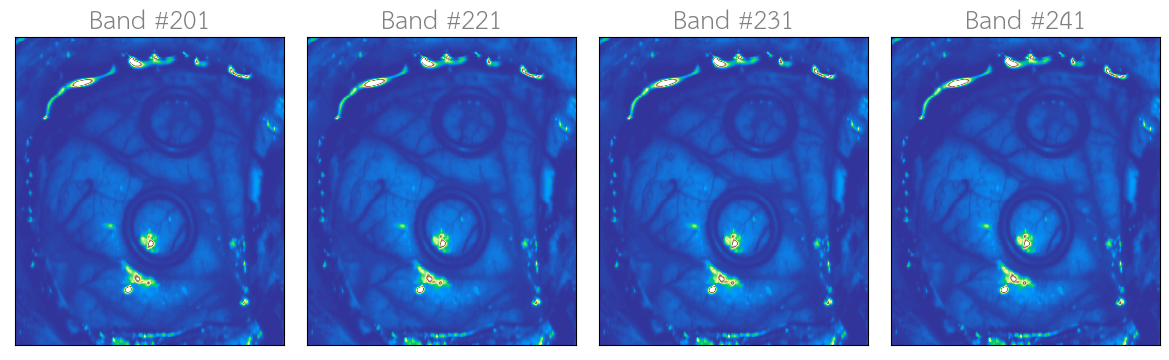

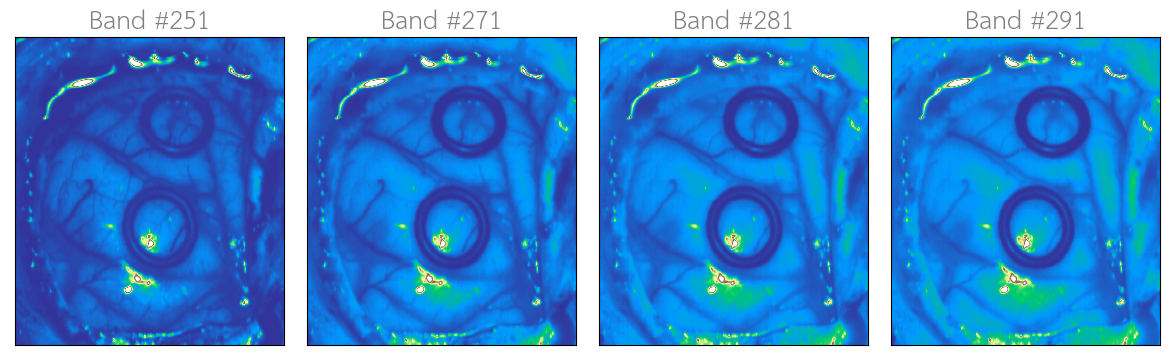

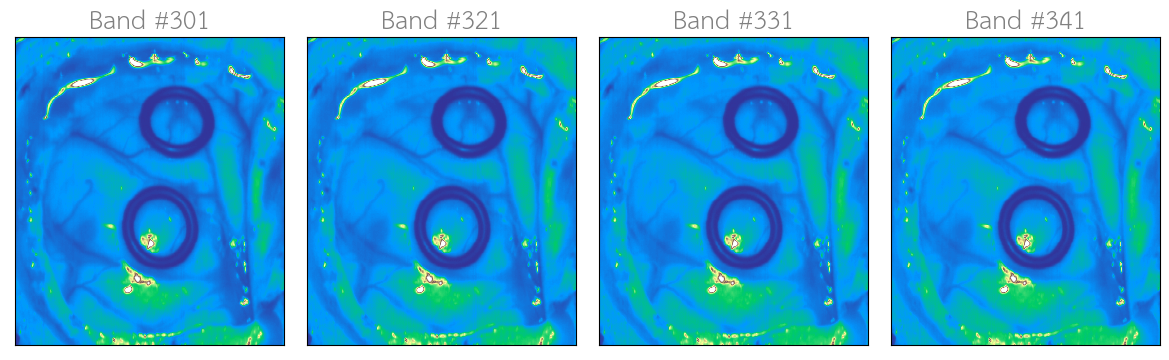

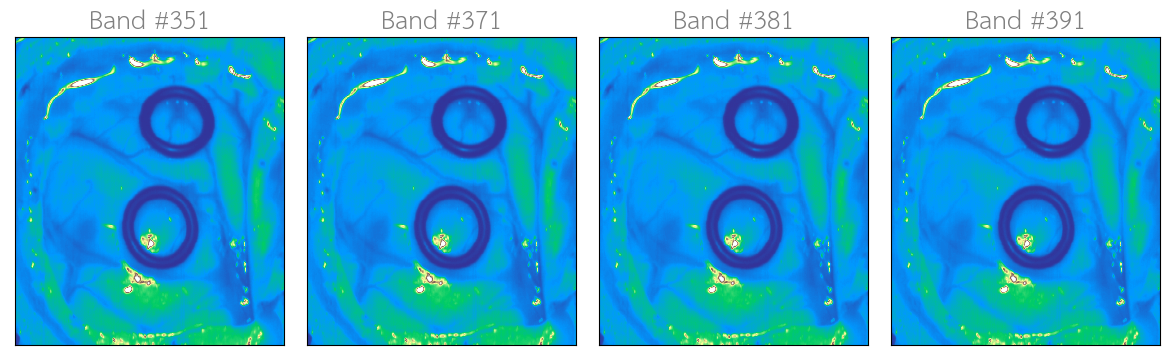

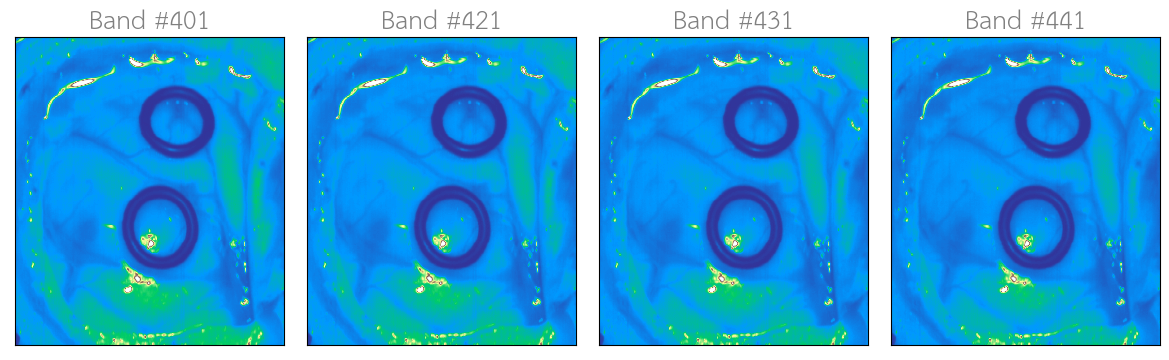

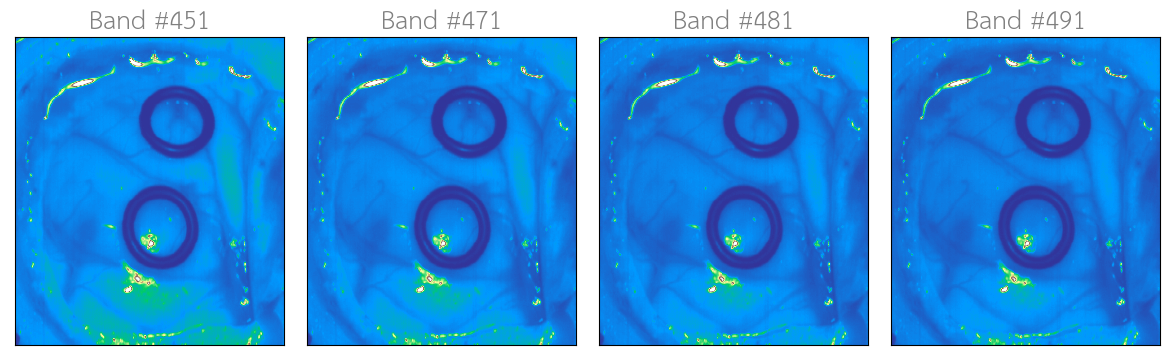

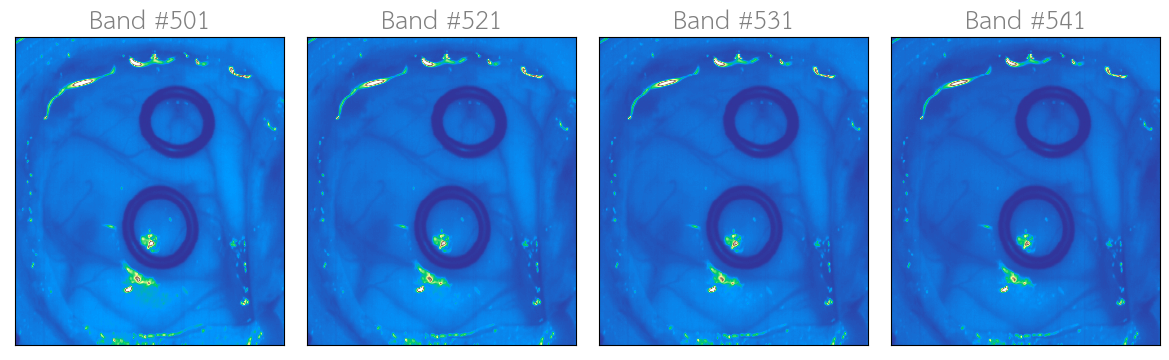

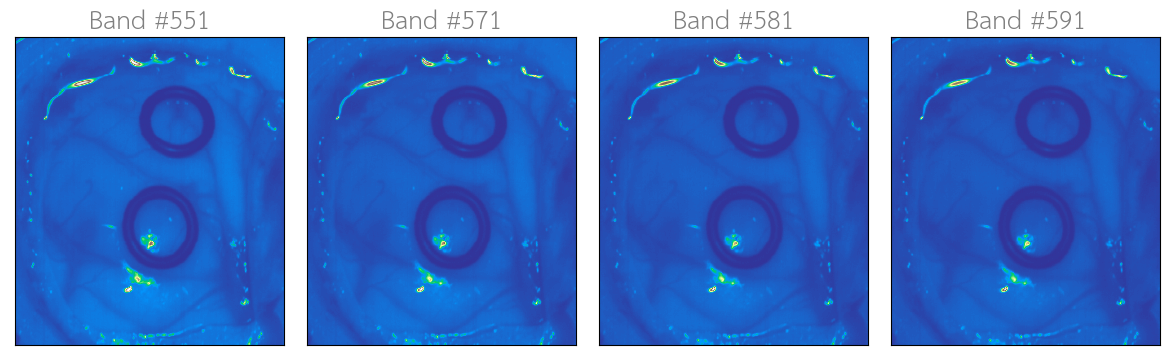

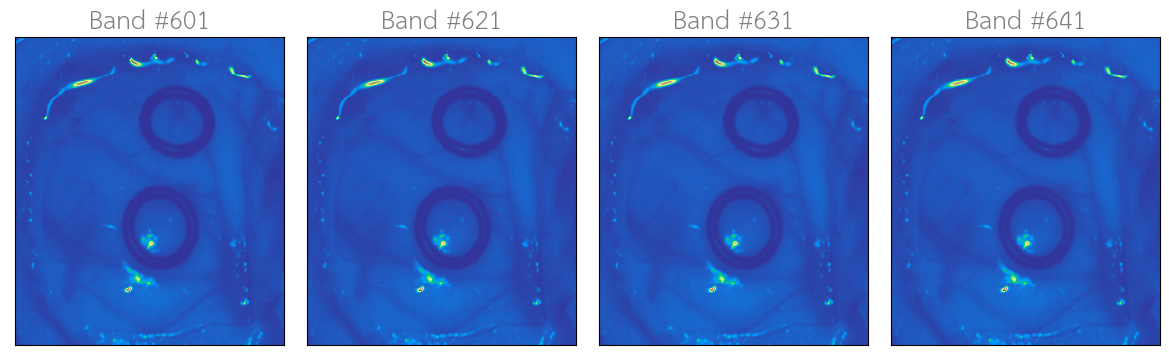

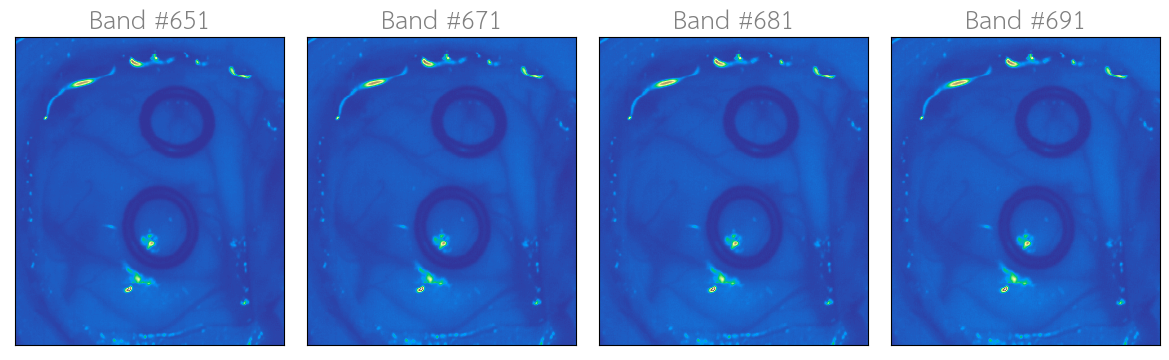

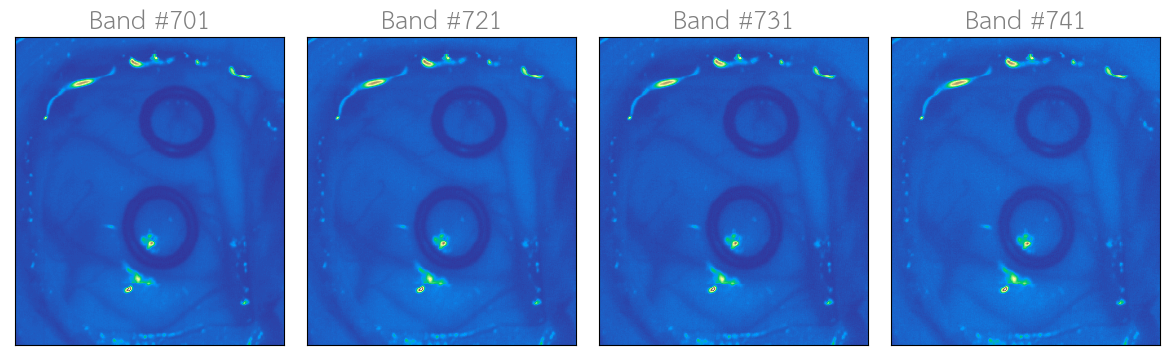

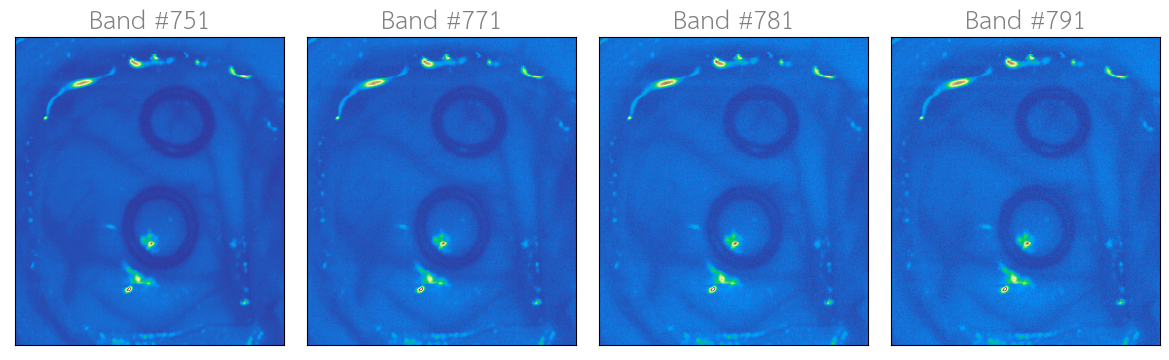

In [10]:
### There are 826 bands in the HELICoiD HSI cubes. We loop over and visualise them below

patient = "020-01"
hdr_path = "/home/ivan/aimlab/HELICoiD/HSI_Human_Brain_Database_IEEE_Access/{}/raw.hdr".format(patient)
img = open_image(hdr_path) 

for i in range(1,img.shape[-1]-50,50):

    
    fig, (ax, ax1, ax2, ax3) = plt.subplots(ncols=4,figsize=(15,4), 
            gridspec_kw={"width_ratios":[0.5,0.5,0.5,0.5]})
    fig.subplots_adjust(wspace=0.02)

    ax.imshow(img[:,:,i].squeeze())
    ax.set_title("Band #{}".format(i), fontsize=18)
    remove_ticks(ax)

    ax1.imshow(img[:,:,i+20].squeeze())
    ax1.set_title("Band #{}".format(i+20), fontsize=18)
    remove_ticks(ax1)

    ax2.imshow(img[:,:,i+30].squeeze())
    ax2.set_title("Band #{}".format(i+30), fontsize=18)
    remove_ticks(ax2)
    #ax2.imshow(mask2[:,:,110].T[10:220,15:225], cmap=cm.Dark2)

    ax3.imshow(img[:,:,i+40].squeeze())
    ax3.set_title("Band #{}".format(i+40), fontsize=18)
    remove_ticks(ax3)
    






array([0., 1., 2., 3., 4.], dtype=float32)

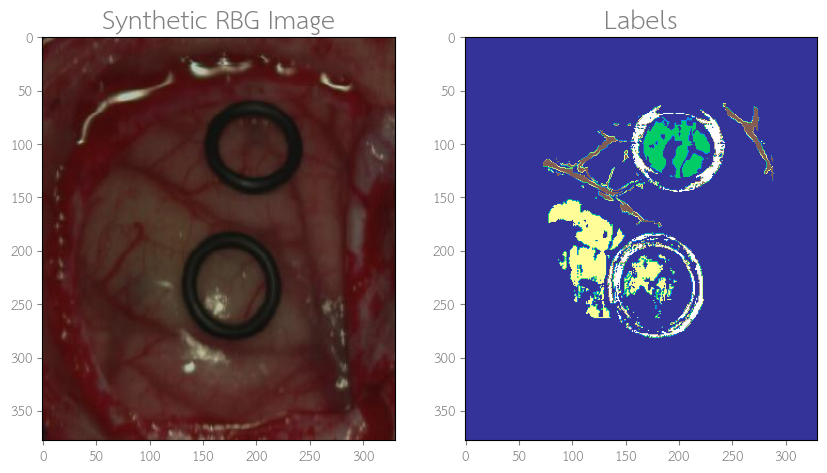

In [11]:
### Visualising a synthetic RBG and label map

## Image:
# The synthetic RGB image is generated by extracting three specific spectral bands from the HS cube with:
# red (708.97 nm), 
# green (539.44 nm), 
# and blue (479.06 nm) colors

## Labels:
# 0 = indicates pixels that are not labelled,
# 1 = Normal Tissue, 
# 2 = Tumour Tissue, 
# 3 = Hypervascularized Tissue, 
# 4 = Background

rbg_path = "/home/ivan/aimlab/HELICoiD/HSI_Human_Brain_Database_IEEE_Access/{}/image.jpg".format(patient)
rbg = Image.open(rbg_path)

gt_path = "/home/ivan/aimlab/HELICoiD/HSI_Human_Brain_Database_IEEE_Access/{}/gtMap.hdr".format(patient)
gt = open_image(gt_path)
gt = gt.load()


fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,10))

ax.imshow(rbg)
ax.set_title("Synthetic RBG Image", fontsize=18)


ax1.imshow(gt[:,:,0].squeeze())
ax1.set_title("Labels", fontsize=18)

np.unique(gt)

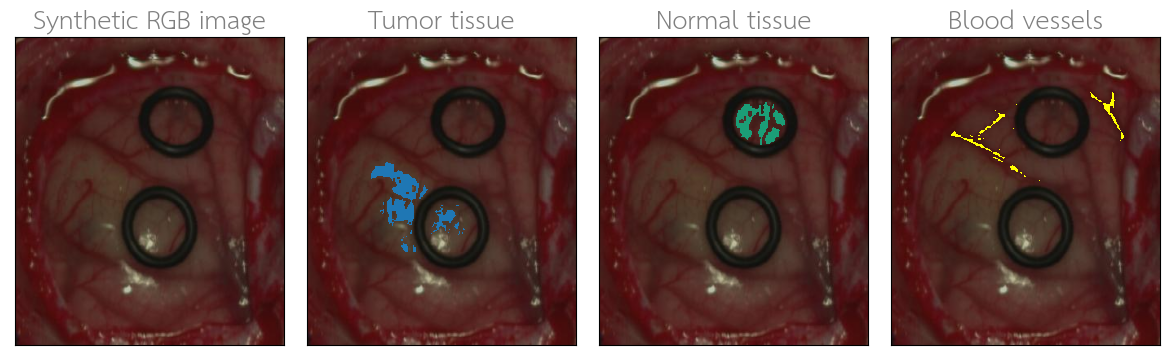

In [12]:
import matplotlib as mpl
mpl.rc('image', cmap='terrain')

mpl.rcParams['text.color'] = 'grey'
mpl.rcParams['xtick.color'] = 'grey'
mpl.rcParams['ytick.color'] = 'grey'
mpl.rcParams['axes.labelcolor'] = 'grey'
plt.rcParams["font.family"] = "Laksaman"

#



# #load
# #data_fk = nib.load(path + folder + "/inferred_tumor_patientspace_mri.nii")
# #data_fk = data_fk.get_fdata()
# #data_me = nib.load(path + folder + "/inferred_tumor_patientspace_m_mri_s.nii")
# #data_me = data_me.get_fdata()
# data_segm = nib.load(path + "/BraTS19_CBICA_BGG_1_seg.nii.gz")
# data_segm = data_segm.get_fdata()
tumor = gt==2
normal = gt==1
blood = gt==3

# t1gd_scan_dep = (data_segm==1) | (data_segm==4)
# enhanc_scan_dep1 = data_segm==1
# enhanc_scan_dep2 = data_segm==4
# enhanc_scan_dep2 = 2*enhanc_scan_dep2

# data_brain = nib.load(path + "/BraTS19_CBICA_BGG_1_t1ce.nii.gz")
# data_brain = data_brain.get_fdata()
# data_brain = (data_brain - np.min(data_brain)) / (np.max(data_brain) - np.min(data_brain))

# #process
# mri_scan_dep = flair_scan_dep
mask1 = np.ma.masked_where(tumor.astype(int) == 0, tumor.astype(int))
mask2 = np.ma.masked_where(normal.astype(int) == 0, normal.astype(int))
mask3 = np.ma.masked_where(blood.astype(int) == 0, blood.astype(int))

#mask3 = np.ma.masked_where((enhanc_scan_dep1.astype(int) + enhanc_scan_dep2.astype(int)) == 0, (enhanc_scan_dep1.astype(int)+enhanc_scan_dep2.astype(int)))
#mask3 = np.ma.masked_where(enhanc_scan_dep2 == 0, enhanc_scan_dep2)



# #plot
# modelname_indep = "FK"
# modelname_dep = "ME"
# meanvalues = np.mean(mri_scan_dep, axis=(0,1))
# s = np.argmax(meanvalues)
# showparameters = 0

fig, (ax, ax1, ax2, ax3) = plt.subplots(ncols=4,figsize=(15,4), 
        gridspec_kw={"width_ratios":[0.5,0.5,0.5,0.5]})
fig.subplots_adjust(wspace=0.02)

ax.imshow(rbg) #, cmap=cm.gray)
ax.set_title("Synthetic RGB image", fontsize=18)
remove_ticks(ax)
#print(data_brain[:,:,s].T.shape)

ax1.imshow(rbg)
ax1.set_title("Tumor tissue", fontsize=18)
remove_ticks(ax1)
ax1.imshow(mask1, cmap=cm.tab10)

ax2.imshow(rbg)
ax2.set_title("Normal tissue", fontsize=18)
remove_ticks(ax2)
ax2.imshow(mask2, cmap=cm.Dark2)

ax3.imshow(rbg)
ax3.set_title("Blood vessels", fontsize=18)
remove_ticks(ax3)
ax3.imshow(mask3, cmap=cm.get_cmap('spring_r'))
plt.savefig("RGB_masks.pdf", dpi=200, bbox_inches="tight")

/home/ivan/aimlab/HELICoiD/venv/lib/python3.8/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


Text(0.5, 1.0, 'RBG')

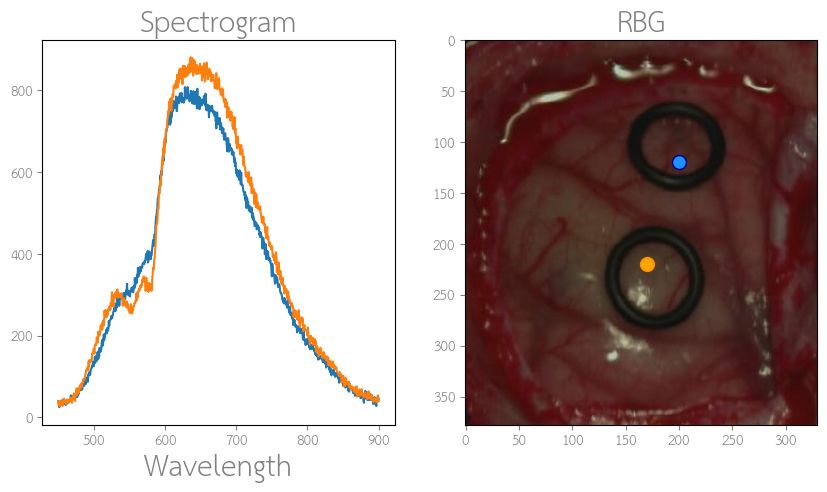

In [13]:
### Visualising a synthetic RBG and label map

## Image:
# The synthetic RGB image is generated by extracting three specific spectral bands from the HS cube with:
# red (708.97 nm), 
# green (539.44 nm), 
# and blue (479.06 nm) colors

## Labels:
# 0 = indicates pixels that are not labelled,
# 1 = Normal Tissue, 
# 2 = Tumour Tissue, 
# 3 = Hypervascularized Tissue, 
# 4 = Background

import os
path = "/home/ivan/aimlab/HELICoiD/HSI_Human_Brain_Database_IEEE_Access"
patient = "020-01"


rbg_path = "/home/ivan/aimlab/HELICoiD/HSI_Human_Brain_Database_IEEE_Access/{}/image.jpg".format(patient)
rbg = Image.open(rbg_path)

gt_path = "/home/ivan/aimlab/HELICoiD/HSI_Human_Brain_Database_IEEE_Access/{}/gtMap.hdr".format(patient)
gt = open_image(gt_path)
gt = gt.load()


### Visualising spectrograms

intensity1 = []
intensity2 = []

blue_dot = [200,120]
orange_dot = [170,220]
wavelength = np.linspace(450, 900, 826)

for i in range(img.shape[-1]):
    intensity1.append(img[blue_dot[0],blue_dot[1],i])
    intensity2.append(img[orange_dot[0],orange_dot[1],i])

    
fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

ax.plot(wavelength, intensity1)
ax.set_xlabel("Wavelength", fontsize=20)
ax.plot(wavelength, intensity2)
#ax.set_xlabel("Wavelength", fontsize=20)
ax.set_title("Spectrogram", fontsize=20)
#ax.set_xlim(650,1000)

ax1.imshow(rbg, aspect="auto")
ax1.plot(blue_dot[0],blue_dot[1], marker="o", markersize=10, markeredgecolor="darkblue", markerfacecolor="dodgerblue")
ax1.plot(orange_dot[0],orange_dot[1], marker="o", markersize=10, markeredgecolor="darkorange", markerfacecolor="orange")
ax1.set_title("RBG", fontsize=20)   

#img.shape

Text(0.5, 1.0, 'Dark reference')

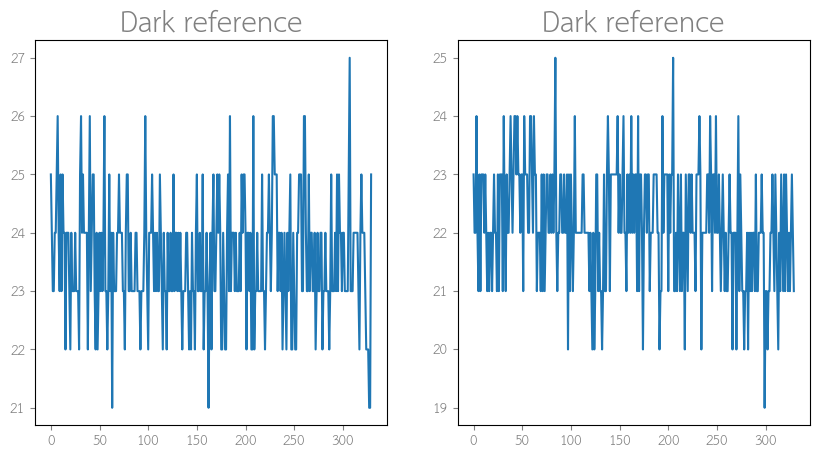

In [14]:
### Visualising dark and white reference

white_path = "/home/ivan/aimlab/HELICoiD/HSI_Human_Brain_Database_IEEE_Access/{}/whiteReference.hdr".format(patient)
white = open_image(white_path)
white = white.load()

dark_path = "/home/ivan/aimlab/HELICoiD/HSI_Human_Brain_Database_IEEE_Access/{}/darkReference.hdr".format(patient)
dark = open_image(dark_path)
dark = dark.load()


fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(10,5))

ax.plot(dark[:,:,0].squeeze(0))
ax.set_title("Dark reference", fontsize=20)

ax1.plot(dark[:,:,400].squeeze(0))
ax1.set_title("Dark reference", fontsize=20)

(450.0, 900.0)

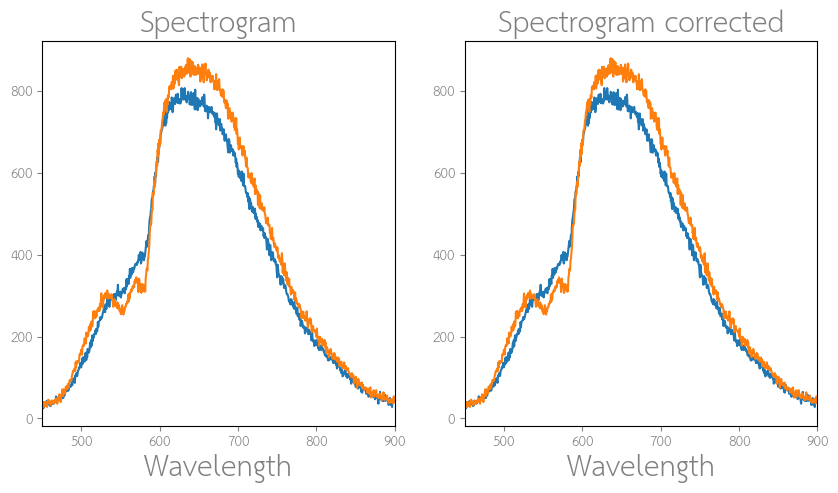

In [42]:
### Visualising spectrograms with calibration

intensity1_c = []
intensity2_c = []

wavelength = np.linspace(450, 900, 826)


for i in range(img.shape[-1]):
    # Raw data for white and dark calibration references comes as (1,345,826) array. It means we have 1d vector
    # for each of the 826 wavelngths.    
    # Here we form a 2d array (to match the HSI image size) for white and dark references out of the 1d data 
    # by repeating the 1d vector 389 times for the current wavelength in the loop. 
    # (1,345,826) --> (389,345) 

    white_full = np.tile(white[:,:,i].squeeze(0), (img.shape[0],1))
    dark_full  = np.tile(dark[:,:,i].squeeze(0).squeeze(1), (img.shape[0],1))
    
    # We wanna calibrate our HSI images w.r.t. white reference. Why? Because we saw by looking at the raw data that different 
    # wavelengths have different reflection from the white materila (i.e. reflecting 99% of light). So
    # we calibrate our HSI images 
    
    intensity1_c.append((img[170,120,i] - dark_full[170,120])/(white_full[170,120]-dark_full[170,120]))
    intensity2_c.append((img[250,120,i] - dark_full[250,120])/(white_full[250,120]-dark_full[170,120]))

    
fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

ax.plot(wavelength, intensity1)
ax.set_xlabel("Wavelength", fontsize=20)
ax.plot(wavelength, intensity2)
#ax.set_xlabel("Wavelength", fontsize=20)
ax.set_title("Spectrogram", fontsize=20)
ax.set_xlim(450,900)

ax1.plot(wavelength, intensity1)
ax1.set_xlabel("Wavelength", fontsize=20)
ax1.plot(wavelength, intensity2)
#ax.set_xlabel("Wavelength", fontsize=20)
ax1.set_title("Spectrogram corrected", fontsize=20)
ax1.set_xlim(450,900)

# Now we will build the compositions (absorption and scattering)

## First, we do absorption

In [43]:
# Calculate the absorption coefficient [cm^-1] of the tissue for the given wavelength:
# mu_a=mu_a_HbO2+mu_a_HHb+mu_a_H2O+mu_a_fat+mu_a_oxCCO+mu_a_redCCO

In [44]:
path_absorp = "/home/ivan/aimlab/UCL-NIR-Spectra/spectra/"
hbo2_absorp = path_absorp + "hb02.txt"
hhb_absorp = path_absorp + "hb.txt"
water_absorp = path_absorp + "matcher94_nir_water_37.txt"
diff_cyto_absorp = path_absorp + "cytoxidase_diff_odmMcm.txt"
fat_absorp = path_absorp + "fat.txt"
cyto_oxy_absorp = path_absorp + "moody cyt aa3 oxidised.txt"
cyto_red_absorp = path_absorp + "moody cyt aa3 reduced.txt"

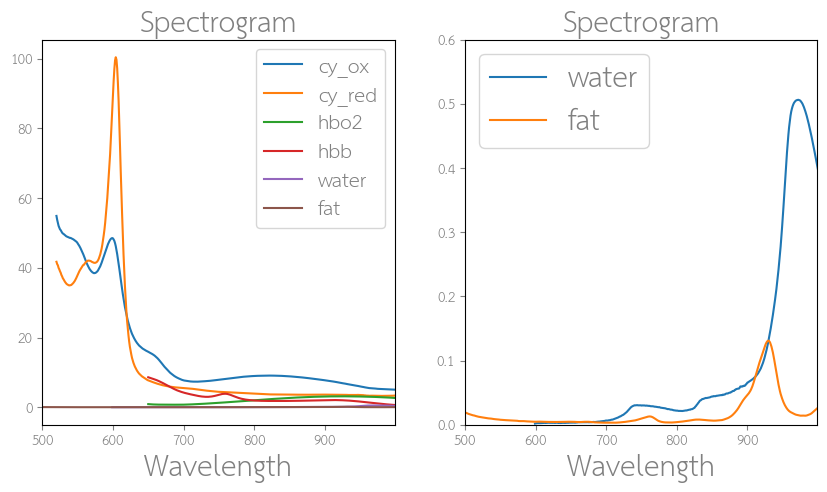

In [92]:
### reading cpectra from .txt
def read_spectra(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

x_cox, y_cox = read_spectra(cyto_oxy_absorp) # cytochrome oxydised
x_cred, y_cred = read_spectra(cyto_red_absorp) # cytochrome reduced
x_hbo2, y_hbo2 = read_spectra(hbo2_absorp) # oxyhemoglobin
x_hbb, y_hbb = read_spectra(hhb_absorp) # hemoglobin
x_water, y_water = read_spectra(water_absorp) # water
x_fat, y_fat = read_spectra(fat_absorp)

y_cox = [i * 2.3025851 for i in y_cox] # from extinction to absorption  
y_cred = [i * 2.3025851 for i in y_cred] # from extinction to absorption  
y_water = [i * 2.3025851 for i in y_water] # from extinction to absorption  
y_hbo2 = [i * 10 * 1000 for i in y_hbo2] # from mm and micromole to cm and minimole 
y_hbb = [i * 10 * 1000 for i in y_hbb] # from mm and micromole to cm and minimole
y_fat = [i / 100 for i in y_fat] # from m to cm 


# cutting all spectra to the range 650 - 1000 nm
left_cut = 500
right_cut = 999

import bisect
# ix_left = x_cox.index(left_cut)
# ix_right = x_cox.index(right_cut)
# x = x_cox[bisect.bisect_left(x_cox, left_cut):bisect.bisect_right(x_cox, right_cut)]
# y_cox = y_cox[ix_left:ix_right+1]

# ix_left = x_cred.index(left_cut)
# ix_right = x_cred.index(right_cut)
# y_cred = y_cred[ix_left:ix_right+1]

# ix_left = x_water.index(left_cut)
# ix_right = x_water.index(right_cut)
# y_water = y_water[ix_left:ix_right+1]

# ix_left = x_hbo2.index(left_cut)
# ix_right = x_hbo2.index(right_cut)
# y_hbo2 = y_hbo2[ix_left:ix_right+1]

# ix_left = x_hbb.index(left_cut)
# ix_right = x_hbb.index(right_cut)
# y_hbb = y_hbb[ix_left:ix_right+1]

# ix_left = x_fat.index(left_cut)
# ix_right = x_fat.index(right_cut)
# y_fat = y_fat[ix_left:ix_right+1]


### Visualising spectrograms of chromophores
fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

ax.plot(x_cox, y_cox, label='cy_ox')
ax.set_xlabel("Wavelength", fontsize=20)
ax.plot(x_cred, y_cred, label='cy_red')
ax.plot(x_hbo2, y_hbo2, label='hbo2')
ax.plot(x_hbb, y_hbb, label='hbb')
ax.plot(x_water, y_water, label='water')
ax.plot(x_fat, y_fat, label='fat')
ax.set_title("Spectrogram", fontsize=20)
ax.set_xlim(left_cut, right_cut)
#ax.set_ylim(0, 15)
ax.legend(fontsize=14)


ax1.plot(x_water, y_water, label='water')
ax1.set_xlabel("Wavelength", fontsize=20)
ax1.plot(x_fat, y_fat, label='fat')
#ax.set_xlabel("Wavelength", fontsize=20)
ax1.set_title("Spectrogram", fontsize=20)
ax1.set_xlim(left_cut, right_cut)
ax1.set_ylim(0, 0.6)
ax1.legend(fontsize=20)


maxpicks = {"w": np.max(y_water), "f": np.max(y_fat), "hbo2": np.max(y_hbo2), "hbb": np.max(y_hbb), 
            "cox": np.max(y_cox), "cred":np.max(y_cred)}
#maxpicks

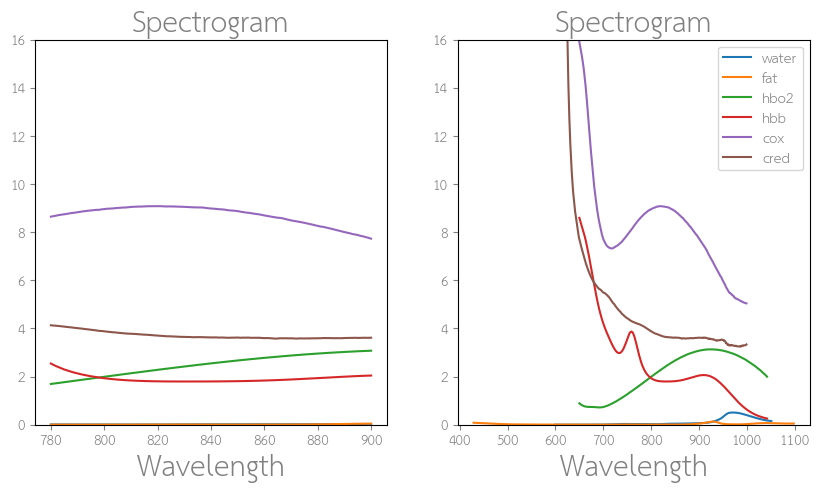

In [93]:
### reading spectra from Luca's paper directly
### careful about water absorption (I guess it is extinction instead)

def read_spectra_all(file_name):
    with open(file_name, 'r') as data:
        x = []
        y1 = []
        y2 = []
        y3 = []
        y4 = []
        y5 = []
        y6 = []
        y7 = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y1.append(float(p[1]))
            y2.append(float(p[2]))
            y3.append(float(p[3]))
            y4.append(float(p[4]))
            y5.append(float(p[5]))
            y6.append(float(p[6]))
            y7.append(float(p[7]))

    return x, y1, y2, y3, y4, y5, y6, y7

x1, yw, yf, yhox, yh, ycox, ycred, ydiff = read_spectra_all("/home/ivan/aimlab/UCL-NIR-Spectra/spectra/all-in-one.txt")

yhox = [i * 2.3025851 / 1000 for i in yhox] # from extinction to absorption  
yh = [i * 2.3025851 / 1000 for i in yh] # from extinction to absorption  
ycox = [i * 2.3025851 / 1000 for i in ycox] # from extinction to absorption  
ycred = [i * 2.3025851 / 1000 for i in ycred] # from mm and micromole to cm and minimole 

### Visualising spectrograms of chromophores from Luca's paper
fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

ax.plot(x1, yw)
ax.set_xlabel("Wavelength", fontsize=20)
ax.plot(x1, yf)
ax.plot(x1, yhox)
ax.plot(x1, yh)
ax.plot(x1, ycox)
ax.plot(x1, ycred)
ax.set_title("Spectrogram", fontsize=20)
#ax.set_xlim(left_cut,right_cut)
ax.set_ylim(0, 16)


ax1.set_xlabel("Wavelength", fontsize=20)

ax1.plot(x_water, y_water, label='water')
ax1.plot(x_fat, y_fat, label='fat')
ax1.plot(x_hbo2, y_hbo2, label='hbo2')
ax1.plot(x_hbb, y_hbb, label='hbb')
ax1.plot(x_cox, y_cox, label='cox')
ax1.plot(x_cred, y_cred, label='cred')

ax1.set_title("Spectrogram", fontsize=20)
#ax1.set_xlim(770, 910)
ax1.set_ylim(0, 16)
ax1.legend()


## Now scattering

In [94]:
# mu_s = mu_s_blood_vessel + mu_s_white_matter + mu_s_grea_matter

In [95]:
# b and g for whole blood, cortex (gm), and cerebellar white matter (wm) 
# from Jacques 2013: Optical properties of bilogical tissues 

# scattering power
b_blood = 0.660
b_gm = 0.334
b_wm = 1.629

# anisotropy
g_blood = 0.9 # from https://omlc.org/spectra/aorta/
g_gm = 0.9 # from a blue
g_wm = 0.9 # same


mu_s_r_blood = np.power(np.divide(x1,500),-b_blood) # Reduced scattering coefficient of the tissue [cm^-1];
mu_s_blood = mu_s_r_blood/(1-g_blood)              # Scattering coefficient of the tissue [cm^-1];

mu_s_r_gm = np.power(np.divide(x1,500),-b_gm)
mu_s_gm = mu_s_r_gm/(1-g_gm)

mu_s_r_wm = np.power(np.divide(x1,500),-b_wm)
mu_s_wm = mu_s_r_wm/(1-g_wm)

(0.0, 10.0)

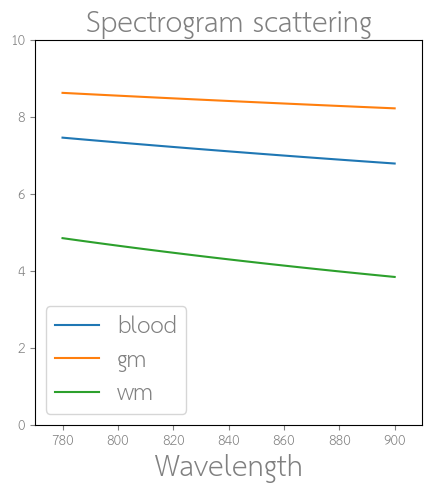

In [96]:
### Visualising spectrograms of tissue scattering
fig, ax = plt.subplots(ncols=1,figsize=(5,5))

ax.plot(x1, mu_s_blood, label="blood")
ax.set_xlabel("Wavelength", fontsize=20)
ax.plot(x1, mu_s_gm, label="gm")
ax.plot(x1, mu_s_wm, label="wm")
ax.legend(fontsize=16)
ax.set_title("Spectrogram scattering", fontsize=20)
ax.set_xlim(770,910)
ax.set_ylim(0, 10)

# Questions:

1. MCMM and parametric optimisation (both local or global) are heavy coputationally.

Remedy: can do MLP, but need one-to-one mapping

2. The ill-posedness of the composition inference problem.

Remedy:
- can we reduce to say 3 number of components (weights of the components are important though)?
- what are physiologically plausible bounds?
- what are the ranges of wavelength we can phisically cover ( e.g. water has a distinct peak close to 1000nm)
- can we inject some contrast agents to get sharp spectra peaks from them (or its against the ain HyperProbe idea)?

3. Dictionary between composition coefficients and biomarkers?
4. Where to get g (anisotrophy) for white,grey matter and blood?
5. Why cytochrome spectra are different (e.g. Moody is quite different from Cooper), which one to use?
 

